<h1>Data analysis and visualisation</h1>
<p>The analysis module processes the clean data from the refine stage, and prepares useful values for visualisation. The <i>pandas</i> module was used by most of analyses.<br/>
The visualisation module contains functionality to create visual representations of the analysis script. Different modules were used to visualise the data, such as <i>matplotlib</i> and <i>wordcloud</i>.<br/>Thre draw_map module locates the users geographically and provides a world map to show the frequency of tweets from different parts of the world.<br/>
The networking module is used to identify connections between the individual users stored within the data set.
</p>

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3

In [3]:
import analysis as an

In [4]:
import visualisation as vis

In [5]:
import draw_map as dm

In [6]:
import network as nt

In [7]:
#Reades in data cleaned by refine module
df=pd.read_csv("../data/CometLanding_ref.csv")

<p>The <i>printAnalysis()</i> function calls a collection of smaller functions that were created to calculate the number of original tweets, retweets and replies per user. This was done by counting how many of each there was, and dividing it by the total number of users. The program can also find the x most popular hashtags, where x ∈ N. This function uses the <i>counter</i> functionality contained in the collections module. It first finds all instances of a hashtag being used and updating the corresponding counter, and then orders the list containing the hashtags and returns the first x elements.
</p>

In [8]:
an.printAnalysis(df)

Number of retweets: 60243
Number of replies: 1718
Number of original tweets: 15122
Number of tweets in total:  77083
most popular hashtags:
cometlanding - 77152
67p - 7948
rosetta - 6611
philae - 3702
esa - 1129


<p>To ensure a good visual represenation of the data at hand, a number of different types of graphs were used to accurately portray the meaning behind the analyses.<br/>
A pie chart was used to represent the structure of tweet types (original tweets/replies/retweets, see below), as these all makes up parts of a whole, and are therefore easily represented in percentage. Retweets were the most common form of tweets by far (78.2% of total tweets), while original tweets (19.6%) and replies were very uncommon (2.2%).
</p>

In [9]:
an.printAverages(df)

Average number of tweets per user 0.30149331100344917
Average number of retweets per user 1.2010885818529817
Average number of replies per user 0.03425244731542955


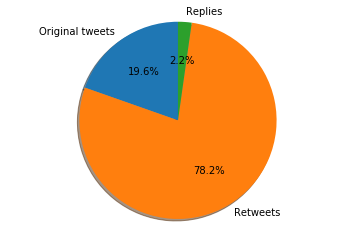

In [10]:
vis.plotStructure(df)

<p>The most popular hashtags were visualised with the use of a word cloud. Only the top 100 were selected to prevent the word cloud from seeming too dense. The largest words on the cloud are the ones that were identified during the by the <i>printAnalysis()</i> function as the most popular ones, which provides support for its accuracy.
</p>

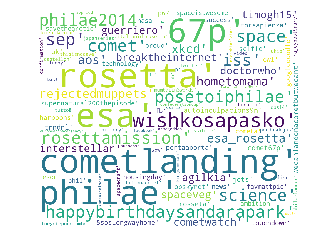

In [11]:
vis.plotHashtagCloud(df)

<p>The changes in user activity were measured over the length of time that the data set is from, and represented in a line chart. The y axis is logarithmic, as there were significantly more tweets in the first few days after the event than later on. The frequency of tweets slowly declines over time, as expected.
</p>

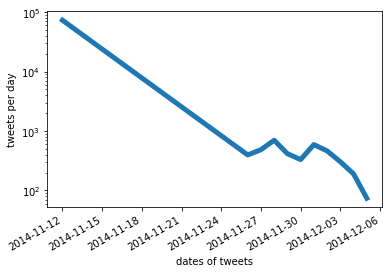

In [12]:
times = an.getTweetsPerDay(df)
vis.plotTweetsPerDay(times)

<p>Changes in user activity were not only measured over the days, but also in reference to the time of day. The Twitter API provides a local and global time measure as well, therefore we created a version for both. The graph turned out to be identical, therefore it can be assumed that the one who retrieved the data was in the same time zone as the default settings. We decided to leave both versions in, as they may behave differently for larger data sets. A histogram is used in both cases in order to make comparison by eye easy.</p>

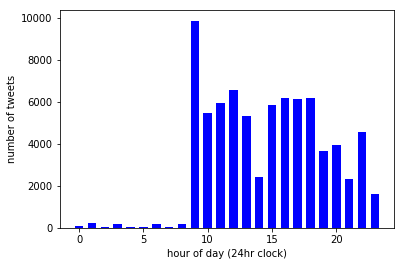

In [13]:
#Global time
hoursOfTweets = an.getTweetsAtTimeOfDayGlobal(df)
vis.plotTweetsPerHour(hoursOfTweets)

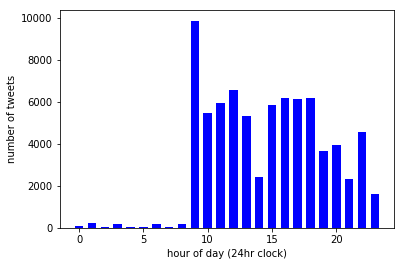

In [14]:
#Local time
hoursOfTweetsLocal = an.getTweetsAtTimeOfDayLocal(df)
vis.plotTweetsPerHour(hoursOfTweetsLocal)

<p>The application times were parsed from the <i>source</i> column of the table with the use of regex. It was then visualised with a pie chart, with the 5 most popular appliances shown individually, and all others grouped together.
</p>

In [15]:
dict = an.getAppsUsed(df)
an.getPopularApps(5, dict)

{'Twitter Web Client': 27916,
 'Twitter for iPhone': 13742,
 'Twitter for Android': 12769,
 'TweetDeck': 4072,
 'Twitter for iPad': 3277,
 'Other': 15307}

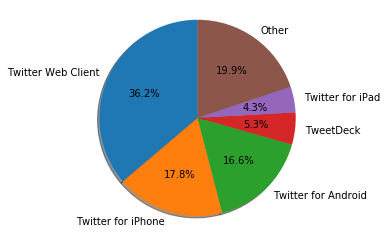

In [16]:
vis.plotApps(df)

<p>The countries from which the users were tweeting from were also collected. This data is displayed on a world map with the use of the <i>cartopy</i> python module. In the case of our data set, the US and UK were the most common sources of tweets, although Canada and certain European countires were tweeting actively as well.</p>

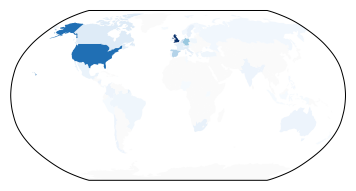

In [17]:
dm.main()

<p>The networking module looks at the connections between all the users based on their replies and retweets and creates an interactive graph that lets us zoom in to various sections of the graph. The centre shows a vastly interconnected network where users interacted with each other a lot, and there are many other data nodes that did not interact with the other users in the set, likely due to posting original tweets. The data was so huge tha only nodes with degrees larger than 40 are shown.
</p>

In [18]:
print("Number of unique users:", an.getNumberOfUniqueUsers(df))


Number of unique users: 50157


In [19]:
import networkx as nx
G = nt.drawNetwork(df)
nx.draw_networkx(G, with_labels = False, node_size = 10)
mpld3.display()